## Probelm Statement 

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## 1. Dataset Preparation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


### 1.1 Import

In [2]:
# Importing libraries necessary for the study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Reading Data file

In [3]:
# reading the train dataset
train = pd.DataFrame(pd.read_csv('/kaggle/input/titanic/train.csv'))
train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# reading the test dataset
test = pd.DataFrame(pd.read_csv('/kaggle/input/titanic/test.csv'))
test.head() 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#Creating a copy 
test_copy=test.copy()

### 1.3 Data Inspection

In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. Data Cleaning

#### Data Cleaning - Missing Value, Duplicates, Imputing, Dropping, Deleting, Exploration

In [10]:
round(100*(train.isnull().sum()/len(train.index)), 2).sort_values(ascending = False) 

Cabin          77.10
Age            19.87
Embarked        0.22
Fare            0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Sex             0.00
Name            0.00
Pclass          0.00
Survived        0.00
PassengerId     0.00
dtype: float64

In [11]:
#Cabin has 77% null data hence we can drop this column
train.drop('Cabin',axis=1,inplace=True)

In [12]:
#Cabin has 77% null data hence we can drop this column
test.drop('Cabin',axis=1,inplace=True)

In [13]:
#remove null values in the dataset
train.dropna(inplace=True)

In [14]:
#unique value in dataframe
cols = train.columns
for i in cols:
    print(i,train[i].unique(),'\n','*********************************************')

PassengerId [  1   2   3   4   5   7   8   9  10  11  12  13  14  15  16  17  19  21
  22  23  24  25  26  28  31  34  35  36  38  39  40  41  42  44  45  50
  51  52  53  54  55  57  58  59  60  61  63  64  67  68  69  70  71  72
  73  74  75  76  79  80  81  82  84  85  86  87  89  90  91  92  93  94
  95  97  98  99 100 101 103 104 105 106 107 109 111 112 113 114 115 116
 117 118 119 120 121 123 124 125 126 128 130 131 132 133 134 135 136 137
 138 139 140 142 143 144 145 146 147 148 149 150 151 152 153 154 156 157
 158 161 162 163 164 165 166 168 170 171 172 173 174 175 176 178 179 180
 183 184 185 188 189 190 191 192 193 194 195 196 198 200 201 203 204 205
 206 207 208 209 210 211 212 213 214 216 217 218 219 220 221 222 223 225
 226 227 228 229 231 232 233 234 235 237 238 239 240 243 244 245 246 247
 248 249 250 252 253 254 255 256 258 259 260 262 263 264 266 267 268 269
 270 272 273 274 276 277 279 280 281 282 283 284 286 287 288 289 290 291
 292 293 294 295 297 298 300 303 306 30

#### Pclass

In [15]:
train.groupby('Pclass').Survived.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,184.0,0.652174,0.477580,0.0,0.0,1.0,1.0,1.0
2,173.0,0.479769,0.501041,0.0,0.0,0.0,1.0,1.0
3,355.0,0.239437,0.427342,0.0,0.0,0.0,0.0,1.0


#### Sex

In [16]:
train.groupby('Sex').Survived.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,259.0,0.752896,0.432163,0.0,1.0,1.0,1.0,1.0
male,453.0,0.205298,0.404366,0.0,0.0,0.0,0.0,1.0


In [17]:
#label encoding
train['Sex']=train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [18]:
#label encoding
test['Sex']=test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

#### SibSp

In [19]:
train.groupby('SibSp').Survived.describe()

,count,mean,std,min,25%,50%,75%,max
SibSp,,,,,,,,
0,469.0,0.368870,0.483014,0.0,0.0,0.0,1.0,1.0
1,183.0,0.530055,0.500465,0.0,0.0,1.0,1.0,1.0
2,25.0,0.440000,0.506623,0.0,0.0,0.0,1.0,1.0
3,12.0,0.333333,0.492366,0.0,0.0,0.0,1.0,1.0
4,18.0,0.166667,0.383482,0.0,0.0,0.0,0.0,1.0
5,5.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


#### Parch

In [20]:
train.groupby('Parch').Survived.describe()

,count,mean,std,min,25%,50%,75%,max
Parch,,,,,,,,
0,519.0,0.354528,0.478832,0.0,0.0,0.0,1.0,1.0
1,110.0,0.554545,0.499291,0.0,0.0,1.0,1.0,1.0
2,68.0,0.573529,0.498241,0.0,0.0,1.0,1.0,1.0
3,5.0,0.600000,0.547723,0.0,0.0,1.0,1.0,1.0
4,4.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,5.0,0.200000,0.447214,0.0,0.0,0.0,0.0,1.0
6,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0


In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [22]:
#Remove columns
train.drop(['Name','Ticket','Fare','PassengerId'],axis=1,inplace=True)

In [23]:
test.drop(['Name','Ticket','Fare'],axis=1,inplace=True)

#### Age_Group 

In [24]:
#Bin the column
train['Age_Group']=0
train.loc[(train['Age']<=15) ,'Age_Group']= 0
train.loc[(train['Age']>15) & (train['Age']<=30) ,'Age_Group']=1
train.loc[(train['Age']>30) & (train['Age']<=45), 'Age_Group']=2
train.loc[(train['Age']>45) & (train['Age']<=60) ,'Age_Group']=3
train.loc[(train['Age']>60) & (train['Age']<=75) ,'Age_Group']=4
train.loc[(train['Age']>75),'Age_Group']=5

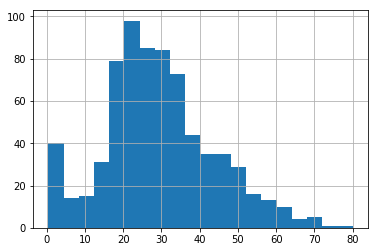

In [25]:
train.Age.hist(bins=20);

In [26]:
test['Age_Group']=0
test.loc[(test['Age']<=15) ,'Age_Group']= 0
test.loc[(test['Age']>15) & (test['Age']<=30) ,'Age_Group']=1
test.loc[(test['Age']>30) & (test['Age']<=45), 'Age_Group']=2
test.loc[(test['Age']>45) & (test['Age']<=60) ,'Age_Group']=3
test.loc[(test['Age']>60) & (test['Age']<=75) ,'Age_Group']=4
test.loc[(test['Age']>75),'Age_Group']=5

#### Embarked

In [27]:
train.groupby('Embarked').Survived.describe()

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,130.0,0.607692,0.490153,0.0,0.0,1.0,1.0,1.0
Q,28.0,0.285714,0.460044,0.0,0.0,0.0,1.0,1.0
S,554.0,0.362816,0.481247,0.0,0.0,0.0,1.0,1.0


In [28]:
#label encoding
train['Embarked']=train['Embarked'].map( {'S': 1, 'C': 0,'Q':2} ).astype(int)

In [29]:
#label encoding
test['Embarked']=test['Embarked'].map( {'S': 1, 'C': 0,'Q':2} ).astype(int)

In [30]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_Group
0,0,3,0,22.0,1,0,1,1
1,1,1,1,38.0,1,0,0,2
2,1,3,1,26.0,0,0,1,1
3,1,1,1,35.0,1,0,1,2
4,0,3,0,35.0,0,0,1,2


In [31]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_Group
0,892,3,0,34.5,0,0,2,2
1,893,3,1,47.0,1,0,1,3
2,894,2,0,62.0,0,0,2,4
3,895,3,0,27.0,0,0,1,1
4,896,3,1,22.0,1,1,1,1


## 3. Data Visualization

#### Distribution of Age Group with Sex and Survived status

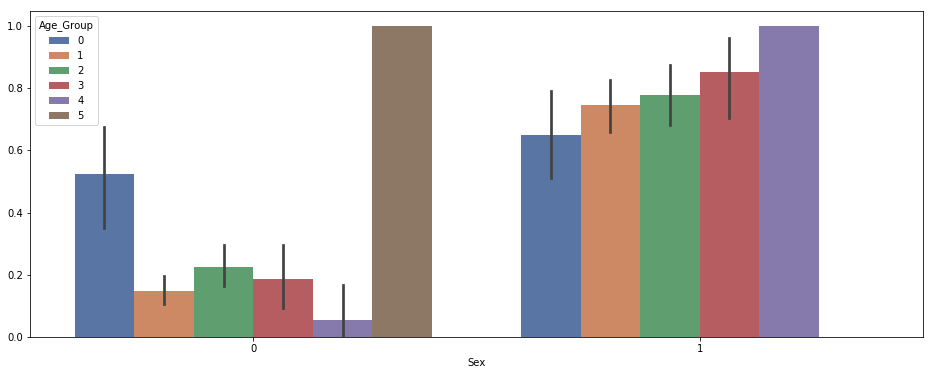

In [32]:
plt.figure(figsize=(16, 6))
sns.barplot(x="Sex", y="Survived", hue="Age_Group", data=train ,palette="deep")
plt.ylabel('')
plt.show()

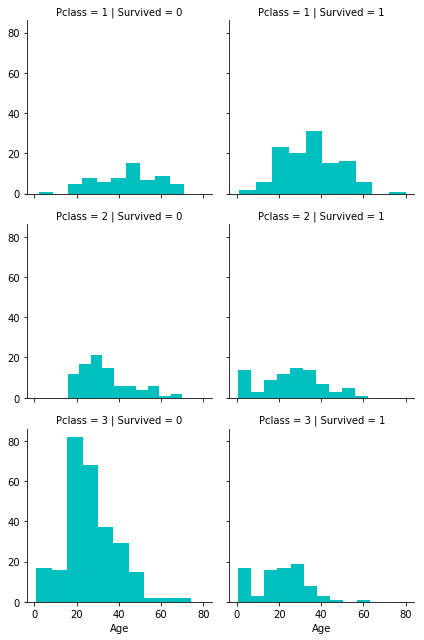

In [33]:
import matplotlib.pyplot as plt
gd = sns.FacetGrid(train, col="Survived",  row="Pclass")
gd = gd.map(plt.hist, "Age",color="c")

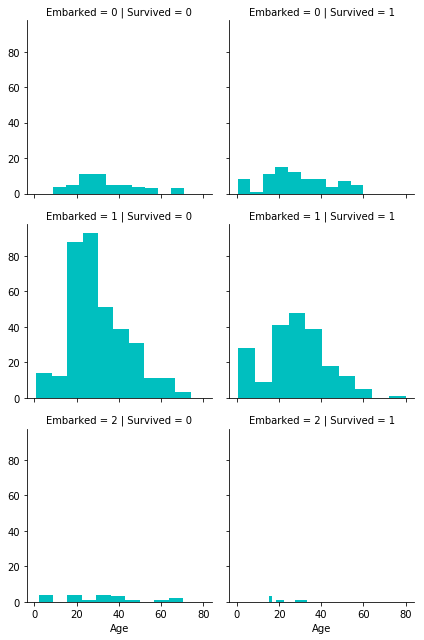

In [34]:
import matplotlib.pyplot as plt
gd = sns.FacetGrid(train, col="Survived",  row="Embarked")
gd = gd.map(plt.hist, "Age",color="c")

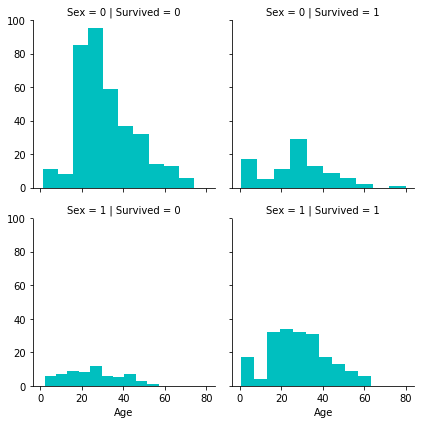

In [35]:
import matplotlib.pyplot as plt
gd = sns.FacetGrid(train, col="Survived",  row="Sex")
gd = gd.map(plt.hist, "Age",color="c")

In [36]:
train.drop(['Age'],axis=1,inplace=True)

In [37]:
test.drop(['Age'],axis=1,inplace=True)

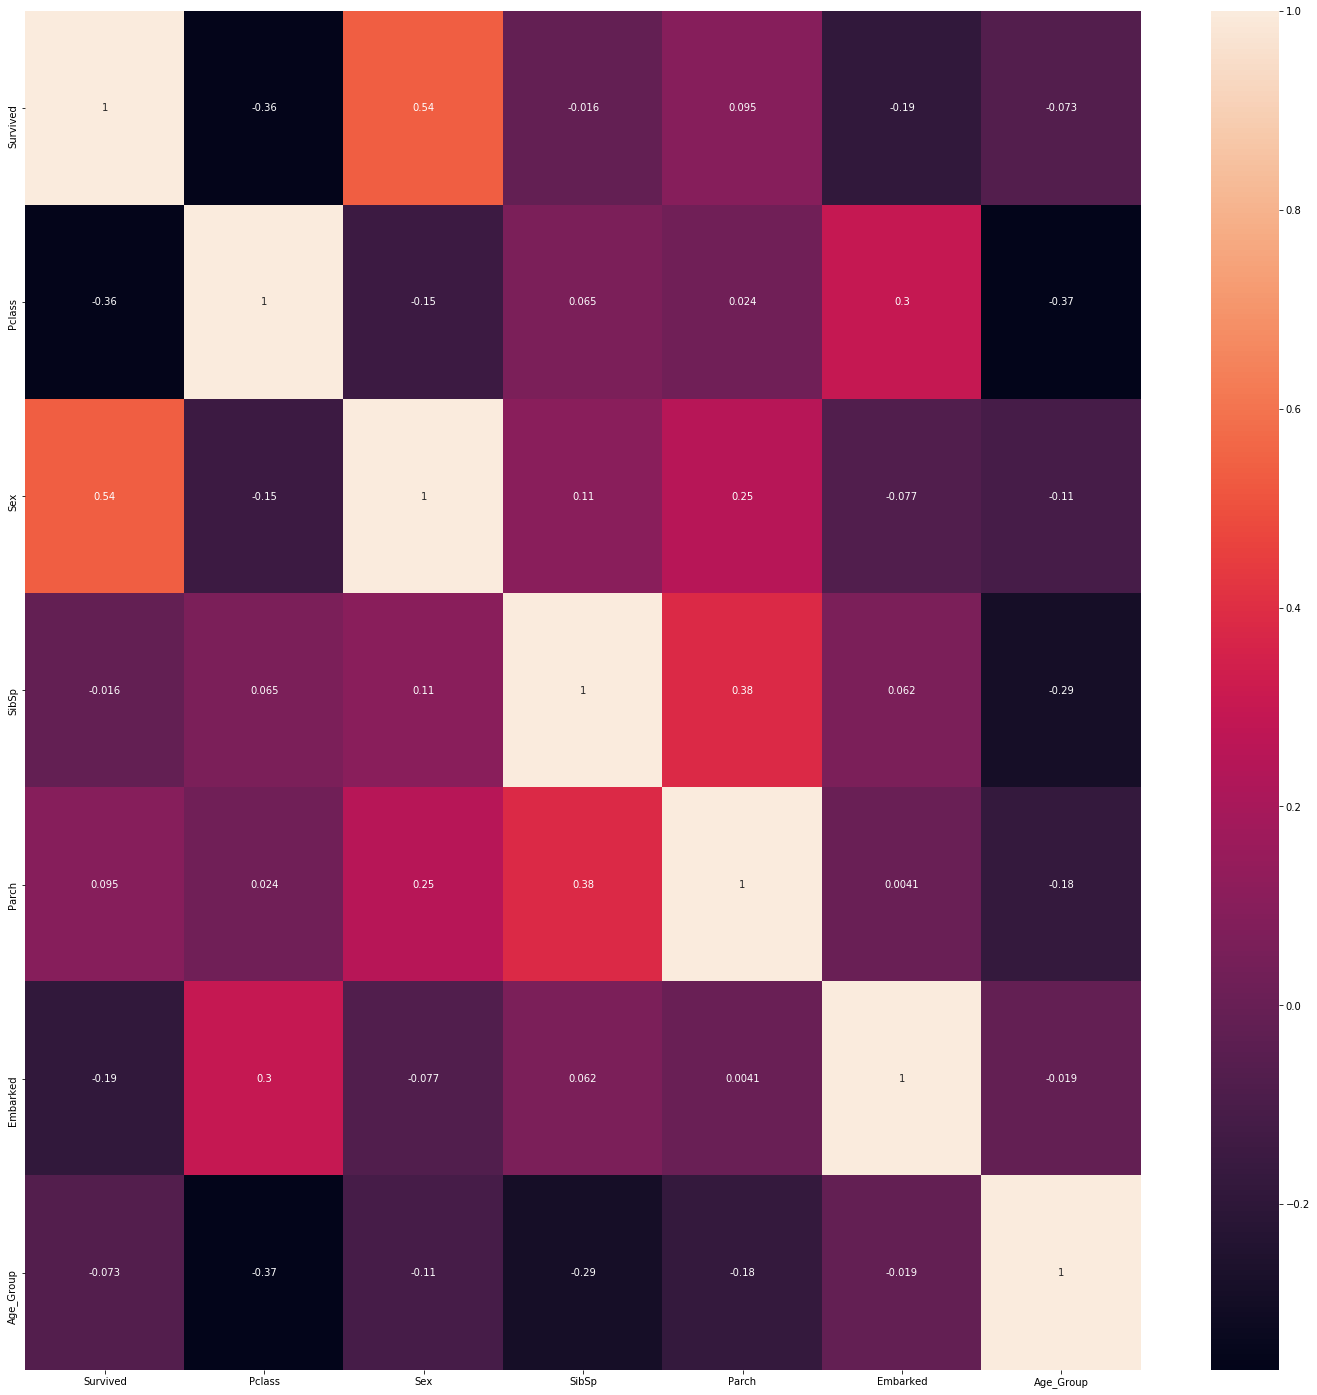

In [38]:
#heatmap
plt.figure(figsize=(25,25))
sns.heatmap(train.corr(), annot= True)

## 4. Modeling and Predictions

#### Spliting the dataset into X and y

In [39]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_train.shape, Y_train.shape

((712, 6), (712,))

In [40]:
X_test  = test.drop("PassengerId", axis=1).copy()
X_test.shape

(418, 6)

In [41]:
X_train.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_Group'], dtype='object')

We will train the model with below 6 predictive models and see which one is best to evaluate the survived status for given test passenger_ids.

- Logistic Regression
- Decision Tree
- Random Forrest
- Ada Boost Classifier
- Gradient Boosting Classifier
- SVC

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
y_pred = log_reg.predict(X_test)
round(log_reg.score(X_train, Y_train) * 100, 2)


80.06

### Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
y_pred = decision_tree.predict(X_test)
round(decision_tree.score(X_train, Y_train) * 100, 2)

86.94

### Ada Boost Classifier

In [44]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier(n_estimators=100)
ada_boost.fit(X_train, Y_train)
y_pred = ada_boost.predict(X_test)
ada_boost.score(X_train, Y_train)
round(ada_boost.score(X_train, Y_train) * 100, 2)

80.9

### Gradient Boosting Classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boost = GradientBoostingClassifier(n_estimators=100)
gradient_boost.fit(X_train, Y_train)
y_pred = gradient_boost.predict(X_test)
gradient_boost.score(X_train, Y_train)
round(gradient_boost.score(X_train, Y_train) * 100, 2)

84.83

### SVC

In [46]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
round(svc.score(X_train, Y_train) * 100, 2)

82.58

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
round(random_forest.score(X_train, Y_train) * 100, 2)

86.94

## Model Evaluation

We can see from the above score that both Random Forest and Decision tree have similar accuracy score but we will be selecting Random Forest algorithm here, as random forest works well on unexpected validation data set.

In [48]:
sub = pd.DataFrame()
sub['PassengerId'] = test_copy['PassengerId']
sub['Survived'] = y_pred
sub.to_csv('Submission_Titanic.csv',index=False)